In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats

def convert_string_to_date(string):
    return datetime.strptime(string, '%b %d, %Y')

litecoin = pd.read_csv("litecoin_20160101-20170817.csv")
bitcoin = pd.read_csv("bitcoin_20160101-20170817.csv")
ethereum = pd.read_csv("ethereum_20160101-20170817.csv")
nem = pd.read_csv("nem_20160101-20170817.csv")

litecoin["Date"] = litecoin["Date"].apply(convert_string_to_date)
bitcoin["Date"] = bitcoin["Date"].apply(convert_string_to_date)
ethereum["Date"] = ethereum["Date"].apply(convert_string_to_date)
nem["Date"] = nem["Date"].apply(convert_string_to_date)
print(litecoin.head())
print(bitcoin.head())
print(ethereum.head())
print(nem.head())

        Date   Open   High    Low  Close     Volume  Market Cap
0 2017-08-16  43.37  45.06  42.57  44.15  120765000  2275660000
1 2017-08-15  45.81  45.84  42.29  43.31  206081000  2403520000
2 2017-08-14  45.83  46.51  45.43  45.80  114402000  2403870000
3 2017-08-13  46.57  48.07  44.33  45.81  242565000  2441760000
4 2017-08-12  47.05  47.62  46.29  46.43  142065000  2466360000
        Date     Open     High      Low    Close      Volume   Market Cap
0 2017-08-16  4200.34  4381.23  3994.42  4376.63  2272040000  69342700000
1 2017-08-15  4326.99  4455.97  3906.18  4181.93  3258050000  71425500000
2 2017-08-14  4066.10  4325.13  3989.16  4325.13  2463090000  67112300000
3 2017-08-13  3880.04  4208.39  3857.80  4073.26  3159090000  64034100000
4 2017-08-12  3650.63  3949.92  3613.70  3884.71  2219590000  60242100000
        Date    Open    High     Low   Close      Volume   Market Cap
0 2017-08-16  289.82  303.41  285.38  302.27   967643000  27249700000
1 2017-08-15  299.95  300.41  27

In [3]:
print(litecoin.shape)
print(bitcoin.shape)
print(ethereum.shape)
print(nem.shape)

(594, 7)
(594, 7)
(594, 7)
(594, 7)


In [4]:
nem["Close"].max()

0.295213

In [5]:
normalisation_coeff = 1
def normalise_close_price(open_price):
    return open_price * normalisation_coeff

normalisation_coeff = 1000 / int(litecoin["Close"].max())
litecoin["normalised_close_price"] = litecoin["Close"].apply(normalise_close_price)

normalisation_coeff = 1000 / int(bitcoin["Close"].max())
bitcoin["normalised_close_price"] = bitcoin["Close"].apply(normalise_close_price)

normalisation_coeff = 1000 / int(ethereum["Close"].max())
ethereum["normalised_close_price"] = ethereum["Close"].apply(normalise_close_price)

normalisation_coeff = 1000 / nem["Close"].max()
nem["normalised_close_price"] = nem["Close"].apply(normalise_close_price)


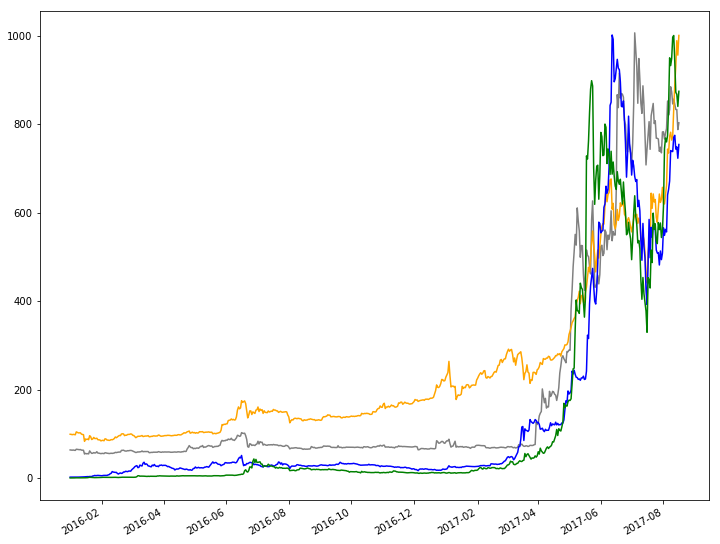

In [39]:
%matplotlib inline

fig, ax = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(12)
ax.plot(litecoin["Date"], litecoin['normalised_close_price'], c="grey")
ax.plot(bitcoin["Date"], bitcoin['normalised_close_price'], c="orange")
ax.plot(ethereum["Date"], ethereum['normalised_close_price'], c="blue")
ax.plot(nem["Date"], nem['normalised_close_price'], c="green")

fig.autofmt_xdate()

In [7]:
new_data_set = litecoin[["Date"]]
new_data_set.head()

litecoin.columns.get_loc("normalised_close_price")

7

In [8]:
new_data_set["litecoin"] = litecoin["normalised_close_price"]
new_data_set["bitcoin"] = bitcoin["normalised_close_price"]
new_data_set["ethereum"] = ethereum["normalised_close_price"]
new_data_set["nem"] = nem["normalised_close_price"]

new_data_set.head()

/home/evis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/evis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/evis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

,Date,litecoin,bitcoin,ethereum,nem
0,2017-08-16,802.727273,1000.143967,753.790524,873.985902
1,2017-08-15,787.454545,955.651280,722.743142,839.827514
2,2017-08-14,832.727273,988.375229,748.379052,867.333078
3,2017-08-13,832.909091,930.818099,743.291771,871.706192
4,2017-08-12,844.181818,887.730804,774.563591,941.980875


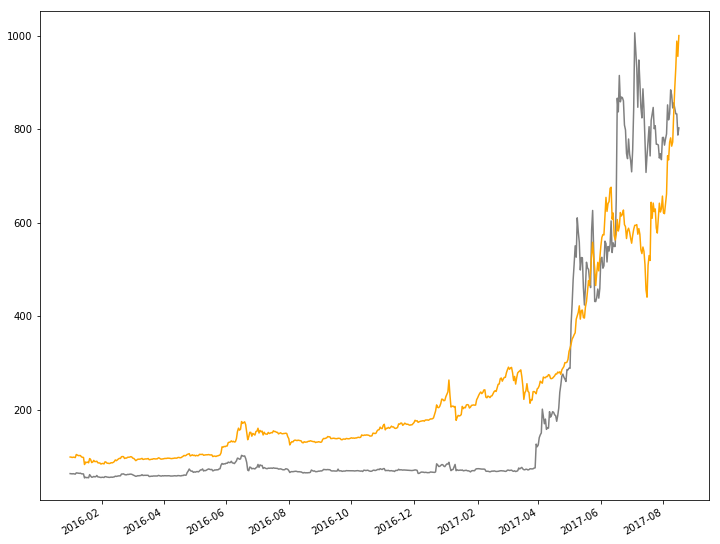

In [38]:
fig, ax = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(12)
ax.plot(new_data_set["Date"], new_data_set['litecoin'], c="grey")
ax.plot(new_data_set["Date"], new_data_set['bitcoin'], c="orange")

fig.autofmt_xdate()

In [10]:
r_value, p_value = stats.pearsonr(new_data_set["bitcoin"], new_data_set["litecoin"])
r_value

0.93058407566126466

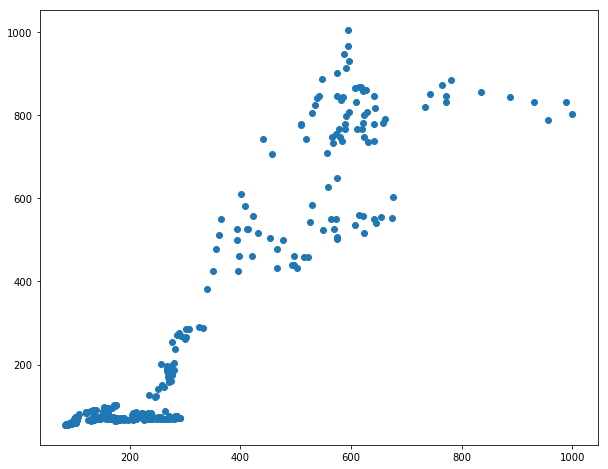

In [34]:
plt.figure(figsize=(10,8))
plt.scatter(new_data_set["bitcoin"], new_data_set["litecoin"])

In [12]:
# Create a linear regression for the correlation between Fandango and Metacritic scores. 
slope, intercept, r_value, p_value, stderr = stats.linregress(bitcoin["Close"], litecoin["Close"])
print(slope)
print(intercept)

0.016117015068
-6.19522412809


In [13]:
def predict_litecoin(bitcoin_price):
    return bitcoin_price * slope + intercept


In [14]:
print(predict_litecoin(4462))

65.7188971055


In [15]:
predicted_litecoin_prices = bitcoin["Close"].apply(predict_litecoin)
predicted_litecoin_prices.head()

0    64.342988
1    61.205005
2    63.512961
3    59.453569
4    56.414705
Name: Close, dtype: float64

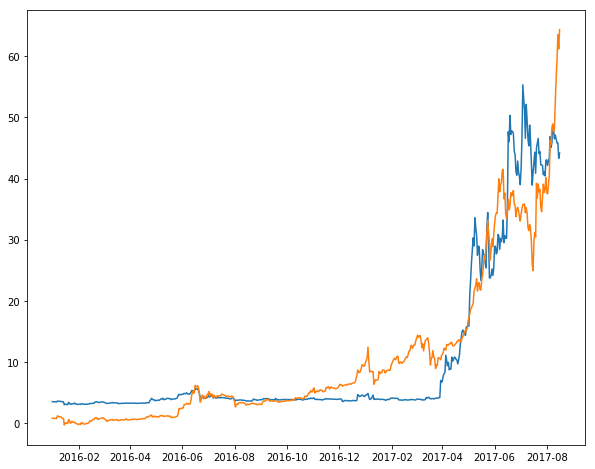

In [36]:
plt.figure(figsize=(10,8))
plt.plot(litecoin["Date"], litecoin["Close"])
plt.plot(litecoin["Date"], predicted_litecoin_prices)

In [17]:
new_data_set.head()

,Date,litecoin,bitcoin,ethereum,nem
0,2017-08-16,802.727273,1000.143967,753.790524,873.985902
1,2017-08-15,787.454545,955.651280,722.743142,839.827514
2,2017-08-14,832.727273,988.375229,748.379052,867.333078
3,2017-08-13,832.909091,930.818099,743.291771,871.706192
4,2017-08-12,844.181818,887.730804,774.563591,941.980875


In [24]:
dat_2017 = new_data_set[new_data_set["Date"] > '2017-05-31']
dat_2017.tail()

,Date,litecoin,bitcoin,ethereum,nem
72,2017-06-05,560.727273,613.987660,619.600998,799.974933
73,2017-06-04,508.000000,573.996801,611.795511,730.191421
74,2017-06-03,502.909091,574.805759,559.551122,728.541765
75,2017-06-02,526.181818,568.681444,558.054863,771.795280
76,2017-06-01,523.636364,550.246801,554.214464,781.113975


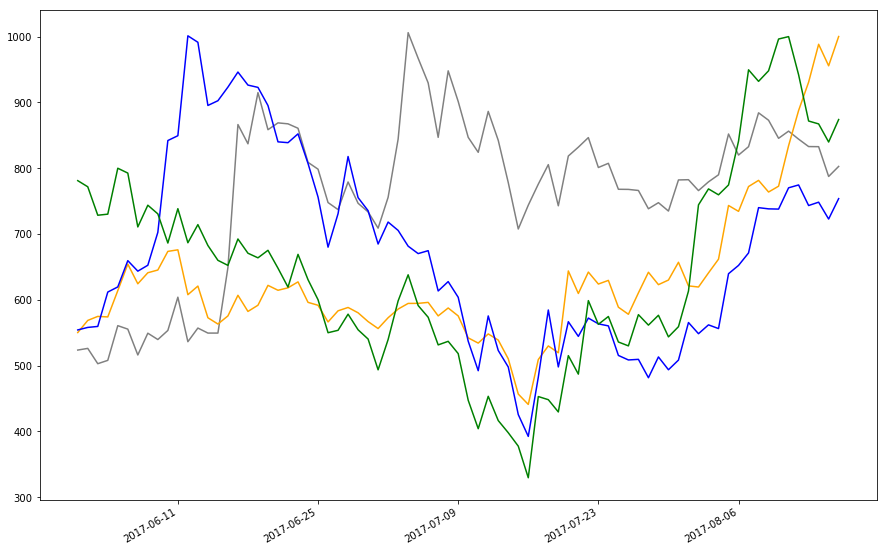

In [27]:
fig, ax = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(15)

ax.plot(dat_2017["Date"], dat_2017['litecoin'], c="grey")
ax.plot(dat_2017["Date"], dat_2017['bitcoin'], c="orange")
ax.plot(dat_2017["Date"], dat_2017['ethereum'], c="blue")
ax.plot(dat_2017["Date"], dat_2017['nem'], c="green")

fig.autofmt_xdate()

In [22]:
r_value_2017, p_value_2017 = stats.pearsonr(dat_2017["bitcoin"], dat_2017["litecoin"])
r_value_2017

0.91399840426588219